# Part 2: The $\alpha - \beta - \gamma$ Filter 

## Tracking a constant velocity aircraft in one dimension

<img src="https://www.kalmanfilter.net/img/AlphaBeta/ex2_oneD_radar.png">

$x_n$ represents the range to the aircraft at time n . The aircraft velocity is defined as the 
rate of change of the range with respect to time, thus the velocity is a derivative of the range:<br>
$\dot{x}= v= \frac{dx}{dt}$

The radar sends a track beam in the direction of the target at a constant rate. The track-to-track interval is Δt.
Assuming constant velocity, the system's dynamic model can be described by two equations of motion:<br>
$x_{n+1}= x_{n}+  \Delta t\dot{x}_{n}$<br>
$\dot{x}_{n+1}= \dot{x}_{n}$

The above system of equations is called a State **Extrapolation Equation**.<br>
This system of equations extrapolates the current state to the next state (prediction).

The **State Update Equation** will now be modified to fit this example.

State Update Equation for position:<br>
$\hat{x}_{n,n}=~ \hat{x}_{n,n-1}+  \alpha  \left( z_{n}- \hat{x}_{n,n-1} \right)$

State Update Equation for velocity:<br>
$\hat{\dot{x}}_{n,n}= \hat{\dot{x}}_{n,n-1}+  \beta  \left( \frac{z_{n}-\hat{x}_{n,n-1}}{ \Delta t} \right)$

A according implementation for 3 iterations would look like this:

for $\alpha$ and $\beta$ we will define constant values.<br>
$\alpha=0.2$<br>
$\beta = 0.1$<br>

The track-to-track interval $t$ is 5 seconds.

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def noisy_range(r):
    return np.random.normal(r,100,1)[0]

In [3]:
# Initial Conditions
x0 = 3000 #meter
v0 = 40 # meter/second
dt = 5 # seconds

a = 0.2
b = 0.1

# First Iteration
prediction_x1 = 3000+v0*dt
prediction_v1 = v0

z1 = noisy_range(x0+v0*1*dt)

estimation_x1 = prediction_x1 + a*(z1-prediction_x1)
estimation_v1 = prediction_v1 + b*((z1-prediction_x1)/dt)

# Second Iteration
prediction_x2 = estimation_x1 + dt*estimation_v1
prediction_v2 = estimation_v1

z2 = noisy_range(x0+v0*2*dt)

estimation_x2 = prediction_x2 + a*(z2-prediction_x2)
estimation_v2 = prediction_v2 + b*((z2-prediction_x2)/dt)

# Third Iteration
prediction_x3 = estimation_x2 + dt*estimation_v2
prediction_v3 = estimation_v2

z3 = noisy_range(x0+v0*3*dt)

estimation_x3 = prediction_x3 + a*(z3-prediction_x3)
estimation_v3 = prediction_v3 + b*((z3-prediction_x3)/dt)


print(f"First Estimation: x={estimation_x1}, v={estimation_v1}")
print(f"Second Estimation: x={estimation_x2}, v={estimation_v2}")
print(f"Third Estimation: x={estimation_x3}, v={estimation_v3}")

First Estimation: x=3168.137605065487, v=36.8137605065487
Second Estimation: x=3354.0521875140553, v=36.99833849813117
Third Estimation: x=3569.3596113225813, v=40.029911629918175


<hr>

In the next block, the above filter will be put into a class with the initialization parameter:
- Initial Guess

The function .run(i) will then estimate the weight for i iterations.

In [4]:
class Filter:
    def __init__(self, x0, v0):
        self.x0 = x0
        self.v0 = v0
        self.dt = 1
        self.a = 0.2
        self.b = 0.1
        
        self.prediction_x = None
        self.prediction_v = None
        
        self.measurement_x = None
        
        self.estimation_x = x0
        self.estimation_v = v0
        
        self.predictions_x = []
        self.measurements_x = []
        self.estimations_x = []
        
    def noisy_range(self,r):
        return np.random.normal(r,100,1)[0]
    
    def run(self,iterations):
        self.iterations = iterations
        for i in range(1,iterations+1):
            
            self.prediction_x = self.estimation_x+self.estimation_v*self.dt
            self.prediction_v = self.estimation_v
            self.predictions_x.append(self.prediction_x)
            
            self.measurement_x = self.noisy_range(self.x0 + i*self.dt*self.v0)
            self.measurements_x.append(self.measurement_x)
            
            self.estimation_x = self.prediction_x + self.a*(self.measurement_x-self.prediction_x)
            self.estimation_v = self.prediction_v + self.b*((self.measurement_x - self.prediction_x)/self.dt)
            self.estimations_x.append(self.estimation_x)
            
    def plot_results(self):
        try:
            plt.plot(range(1,self.iterations+1),[self.x0+self.v0*i for i in range(1,self.iterations+1)],"r",self.measurements_x,"b--*", self.estimations_x,"g",self.predictions_x,"m")
            ax = plt.gca()
            plt.legend(["Ground Truth","Measurements","Estimation","Prediction"])
            ax.set_xlabel('Iterations')
            ax.set_ylabel('Meter')
        except:
            print("Execute the .run() funtion first.")
        
        
        
    

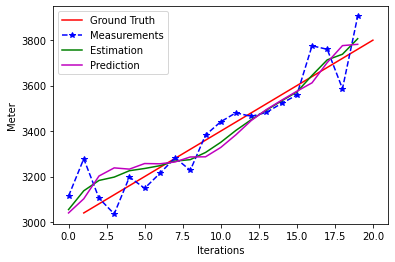

In [5]:
f = Filter(x0=3000, v0=40)
f.run(20)
f.plot_results()

We can see that our estimation algorithm has a smoothing effect on the measurements, and it converges towards the true value<br>

The value of $\alpha$ and $\beta$ shall depend on the measurement precision. If we use very precise equipment, like a laser radar, we would prefer a high  $\alpha$ and $\beta$ that follow measurements. In this case, the filter would quickly respond to a velocity change of the target. On the other hand, if measurement precision is low, we would prefer a low  $\alpha$ and $\beta$ . In this case, the filter will smooth the uncertainty (errors) in the measurements. However, the filter reaction to target velocity changes will be much slower.